## Wine dataset from (UCI) using the LDA technique for Dimensionality Reduction

#### Part 1: Data Preprocessing

In [24]:
# import the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
# import the dataset
dataset = pd.read_csv('Wine.csv')
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values

In [26]:
# spliting the dataset into train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [27]:
# feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

#### Part 2: Building a Linear Discriminant analysis for Dimensionality Reduction

In [28]:
# import LDA model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [29]:
# initialize the LDA
lda = LDA(n_components = 2)

In [36]:
# fitting the LDA model
X_test = lda.fit_transform(X_test, y_test)

C:\Users\amira\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


In [37]:
# import the Logistic Regression model from sklearn using the 2 variances with the help of LDA
from  sklearn.linear_model import LogisticRegression
LG=LogisticRegression(random_state=0)

In [38]:
# fit the Logistic Regression model
LG.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Part 3: Making the Prediction and the Visulaize the result

In [39]:
# predict the Logistic regression model
y_pred=LG.predict(X_test)

In [40]:
# making a confusion metrics
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test,y_pred)

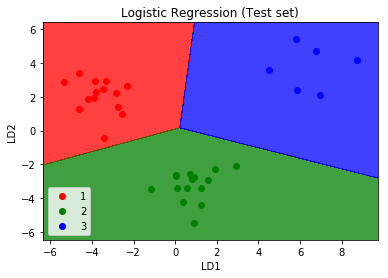

In [41]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, LG.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()